In [43]:
import os
import datetime
import requests

from meteostat import Point, Daily

import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

import pandas as pd
import numpy as np

from google.cloud import bigquery
import pandas_gbq
from google.oauth2 import service_account

import os
import sys
sys.path.append('./..')
import ds_functions as ds

credentials = service_account.Credentials.from_service_account_file('running-342013-76741001e21e.json')

project_id = 'running-342013'
client = bigquery.Client(credentials = credentials, project = project_id)

In [2]:
def readConfig(key):
    config = pd.read_csv(r'c:\users\lkave\documents\github\config.txt', header = None)
    config = [c.split('=') for c in config[0]]
    out = [c[1] for c in config if c[0] == key][0]
    return(out)

def dbGetQuery(q):
    dat = client.query(q).result().to_dataframe()

    return(dat)

In [127]:
q = """
SELECT date(start_date_local) as utc_dt, FORMAT_DATE('%A', start_date_local) as day, start_lat, start_long
FROM runs.activities
WHERE start_date_local >= '2012-01-01'
AND lower(type) = 'run'
"""

df = dbGetQuery(q)
df = df.set_index('utc_dt')
df.shape

(1466, 3)

In [143]:
# Set time period
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

# Create Point for Vancouver, BC
location = Point(df.start_lat[0], df.start_long[0], 0)

# Get daily data for 2018
data = Daily(location, start, end)
data = data.fetch()
data = data[['tavg', 'tmin', 'tmax', 'prcp']]

In [129]:
df = df.join(data)
df = df.reset_index().rename(columns={'index':'dt'})

In [131]:
df['tavg_f'] = [(c * 9/5) + 32 for c in df.tavg]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:>

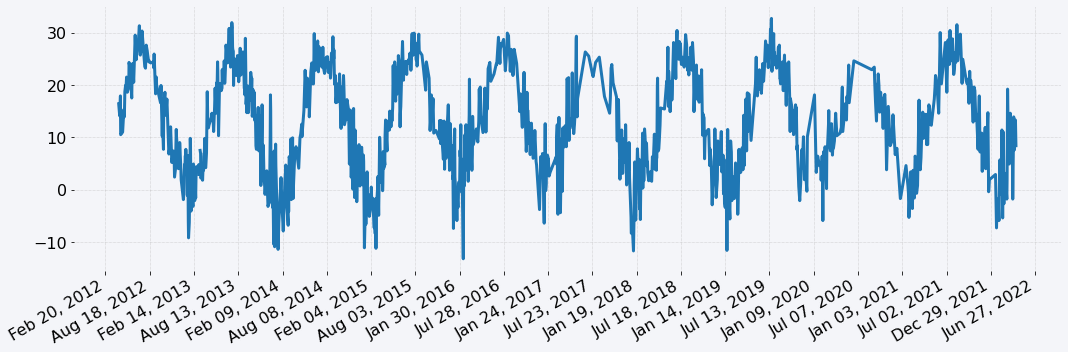

In [133]:
ax = ds.getAx(ds.getFig())

ax.plot(df.dt, df.tavg)

ds.styleAxis(ax, xdate = True, xfmt = '%b %d, %Y', xint = 180, rotate_x_labels = 30)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:>

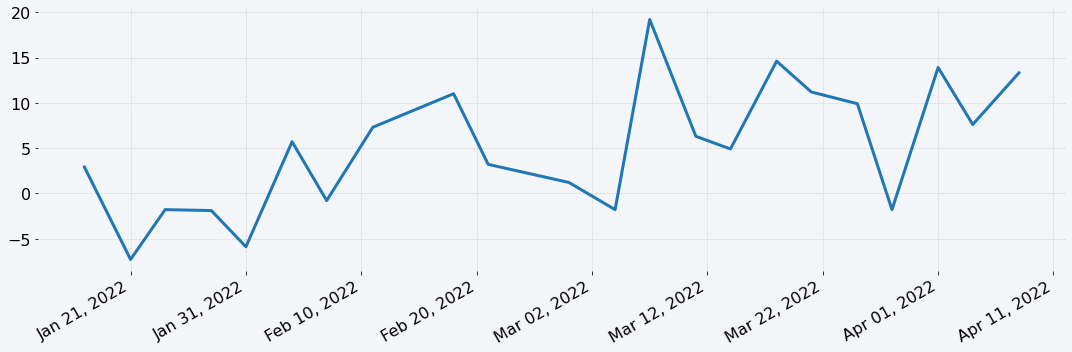

In [135]:
ax = ds.getAx(ds.getFig())

sd = datetime.date(2022,1,1)
tp = df.loc[[c in ('Monday', 'Friday') and d > sd for c,d in zip(df.day, df.dt)]]
ax.plot(tp.dt, tp.tavg)

ds.styleAxis(ax, xdate = True, xfmt = '%b %d, %Y', xint = 10, rotate_x_labels = 30)

In [136]:
out = pd.DataFrame(columns = ['yr', 'std_temp', 'num_runs'])
for yr in range(2013,2023,1):
    tp = df.loc[[c in ('Monday', 'Friday') and (d.year == yr) and (d.month in [1,2,3]) for c,d in zip(df.day, df.dt)]]
    row = [[yr, np.std(list(tp.tavg_f)), len(tp)]]
    
    out = out.append(pd.DataFrame(row, columns = out.columns))

<AxesSubplot:ylabel='Std. dev. of Mon/Fri temperatures'>

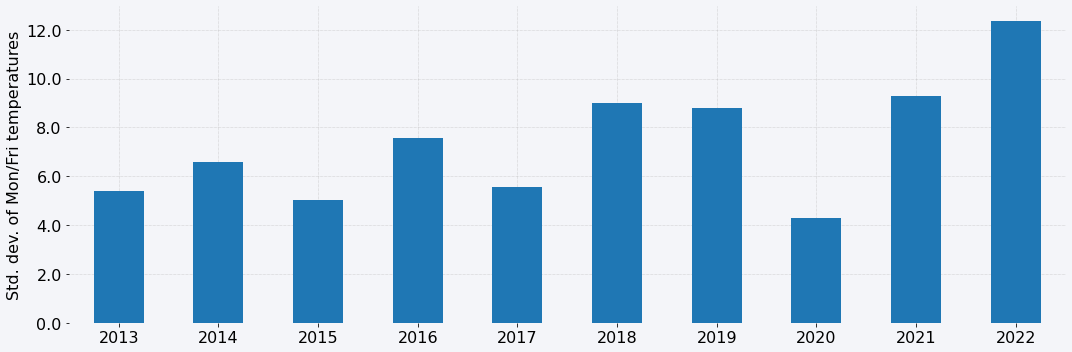

In [137]:
ax = ds.getAx(ds.getFig())

out[['yr', 'std_temp']].set_index('yr').plot(kind = 'bar', ax = ax)

ax.set_ylabel('Std. dev. of Mon/Fri temperatures')
ax.set_xlabel('')
ds.styleAxis(ax, yfmt = '{:,.1f}')

In [138]:
out = pd.DataFrame(columns = ['yr', 'std_temp', 'num_runs'])
for yr in range(2013,2023,1):
    tp = df.loc[[(d.year == yr) and (d.month in [1,2,3]) for c,d in zip(df.day, df.dt)]]
    row = [[yr, np.std(list(tp.tavg_f)), len(tp)]]
    
    out = out.append(pd.DataFrame(row, columns = out.columns))

<AxesSubplot:ylabel='Std. dev. of Mon/Fri temperatures'>

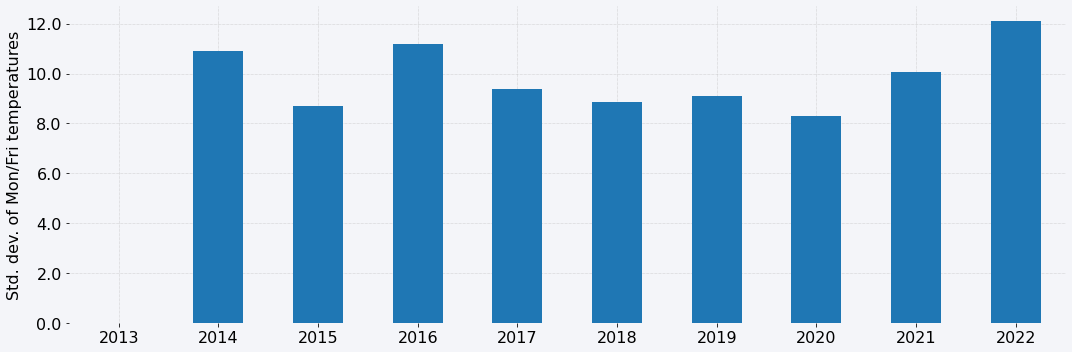

In [139]:
ax = ds.getAx(ds.getFig())

out[['yr', 'std_temp']].set_index('yr').plot(kind = 'bar', ax = ax)

ax.set_ylabel('Std. dev. of Mon/Fri temperatures')
ax.set_xlabel('')
ds.styleAxis(ax, yfmt = '{:,.1f}')

In [161]:
# Set time period
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.today()

# Create Point for Vancouver, BC
location = Point(df.start_lat[0], df.start_long[0], 0)

# Get daily data for 2018
data = Daily(location, start, end)
data = data.fetch()
data = data[['tavg', 'tmin', 'tmax', 'prcp']]

data = data.reset_index().rename(columns = {'time': 'dt'})

In [162]:
data['day'] = [c.weekday() for c in data.dt]

In [165]:
out = pd.DataFrame(columns = ['yr', 'std_temp', 'num_runs'])
for yr in range(2000,2023,1):
    tp = data.loc[[c in (0,4) and (d.year == yr) and (d.month in [1,2,3]) for c,d in zip(data.day, data.dt)]]
    row = [[yr, np.std(list(tp.tavg)), len(tp)]]
    
    out = out.append(pd.DataFrame(row, columns = out.columns))

<AxesSubplot:ylabel='Std. dev. of Mon/Fri temperatures'>

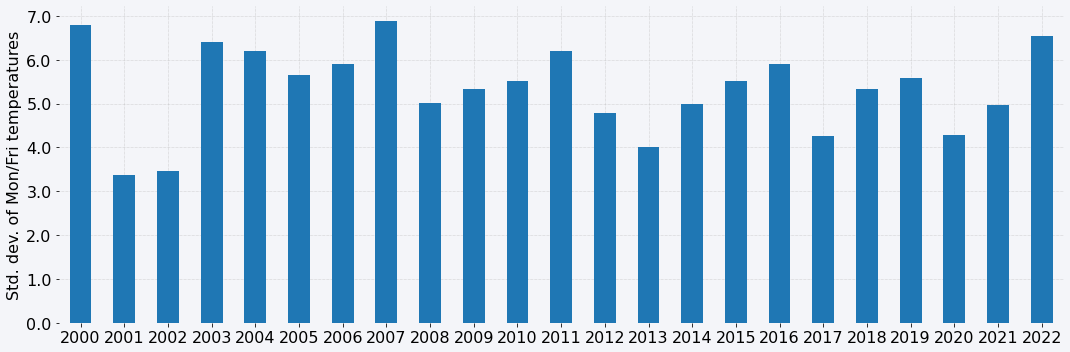

In [166]:
ax = ds.getAx(ds.getFig())

out[['yr', 'std_temp']].set_index('yr').plot(kind = 'bar', ax = ax)

ax.set_ylabel('Std. dev. of Mon/Fri temperatures')
ax.set_xlabel('')
ds.styleAxis(ax, yfmt = '{:,.1f}')